# Importing the Required Libraries

In [ ]:
import nbimporter
from cric_sheet import CricketDataProcessor
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings('ignore')
print(os.getcwd())

: 

In [ ]:
# Read the combined CSV file into a DataFrame

df_ipl = pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\ipl_json_combined.csv")
df_odi = pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\odis_json_combined.csv")
df_t20 = pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\t20s_json_combined.csv")
df_test = pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\tests_json_combined.csv")


In [3]:
missing_percentage = df_ipl.isnull().mean() * 100

missing_percentage

Date                   0.000000
Match_Number           6.063928
City                   4.751265
Venue                  0.000000
Season                 0.000000
Name                   0.000000
Match_Type             0.000000
Total_Overs            0.000000
Teams_Participated     0.000000
Toss_Winner            0.000000
Choose_To              0.000000
Total_Runs            53.434003
Match_Winner           1.580561
Man_Of_Match           0.187797
Team                   0.000000
Over                   4.963207
Batter                 0.000000
Bowler                 0.000000
Non_striker            0.000000
Batter_runs            0.000000
Extras                 0.000000
Total_runs             0.000000
Type                  95.036793
Player_Out            95.036793
Fielder_Name          96.414993
Over_Number           95.036793
dtype: float64

In [4]:
missing_percentage = df_odi.isnull().mean()

missing_percentage

Date                  0.000000
Match_Number          0.069826
City                  0.107196
Venue                 0.000000
Season                0.000000
Name                  0.003793
Match_Type            0.000000
Total_Overs           0.000000
Teams_Participated    0.000000
Toss_Winner           0.000000
Choose_To             0.000000
Total_Runs            0.508734
Match_Winner          0.027644
Man_Of_Match          0.049699
Team                  0.000000
Over                  0.027297
Batter                0.000000
Bowler                0.000000
Non_striker           0.000000
Batter_runs           0.000000
Extras                0.000000
Total_runs            0.000000
Type                  0.972703
Player_Out            0.972703
Fielder_Name          0.982402
Over_Number           0.972703
dtype: float64

In [ ]:
df_ipl.columns 

Index(['Date', 'Match_Number', 'City', 'Venue', 'Season', 'Name', 'Match_Type',
       'Total_Overs', 'Teams_Participated', 'Toss_Winner', 'Choose_To',
       'Total_Runs', 'Match_Winner', 'Man_Of_Match', 'Team', 'Over', 'Batter',
       'Bowler', 'Non_striker', 'Batter_runs', 'Extras', 'Total_runs', 'Type',
       'Player_Out', 'Fielder_Name', 'Over_Number'],
      dtype='object')

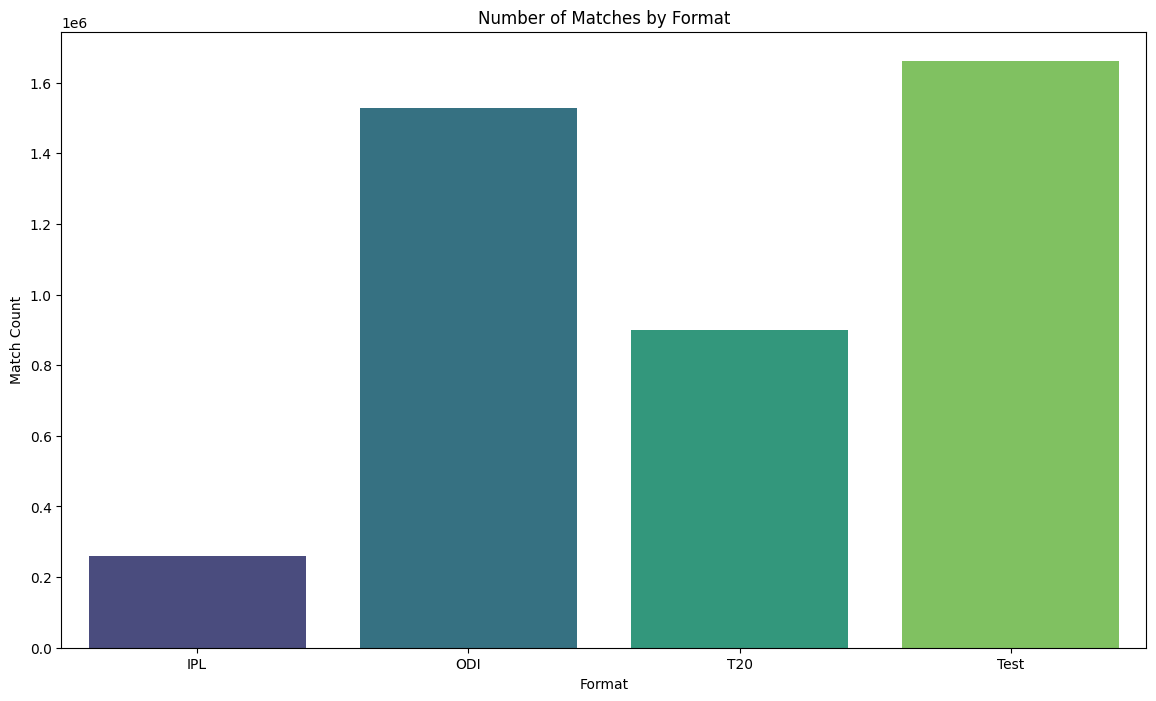

In [7]:
# Create a DataFrame for comparison

match_counts = pd.DataFrame({
    'Format': ['IPL', 'ODI', 'T20', 'Test'],
    'Match Count': [len(df_ipl), len(df_odi), len(df_t20), len(df_test)]
})

# Plotting
plt.figure(figsize=(14,8))
sns.barplot(data=match_counts, x='Format', y='Match Count', palette='viridis')
plt.title('Number of Matches by Format')
plt.show()

2. Top 10 Venues with the Most Matches (for IPL)

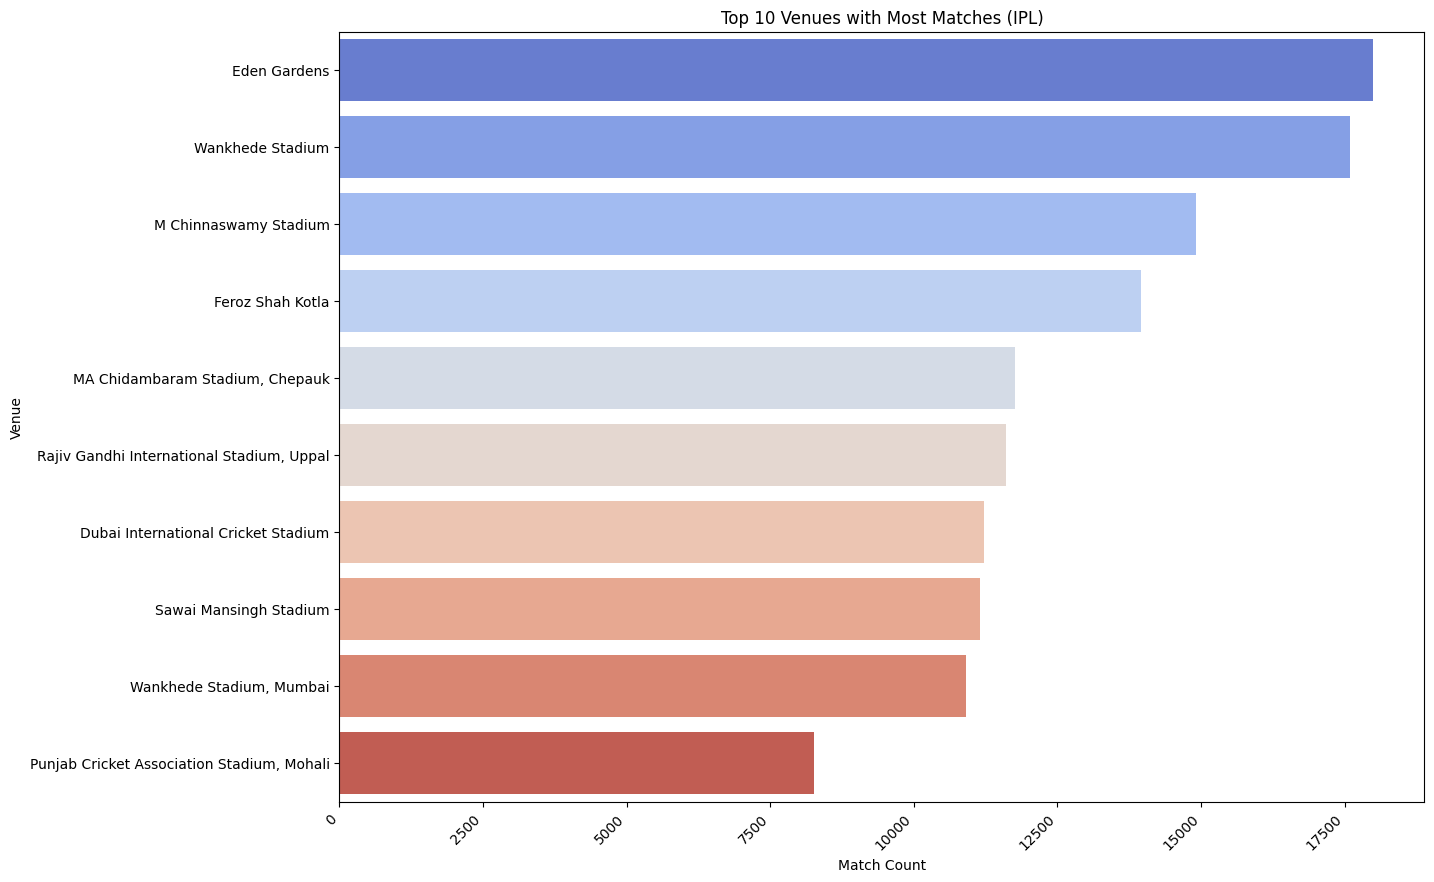

In [8]:
top_venues = df_ipl['Venue'].value_counts().head(10)

plt.figure(figsize=(14, 10))
plt.xticks(rotation=45, ha='right')
sns.barplot(y=top_venues.index, x=top_venues.values, palette='coolwarm')
plt.title('Top 10 Venues with Most Matches (IPL)')
plt.xlabel('Match Count')
plt.show()

3. Runs Scored per Year (Assuming Date Column)

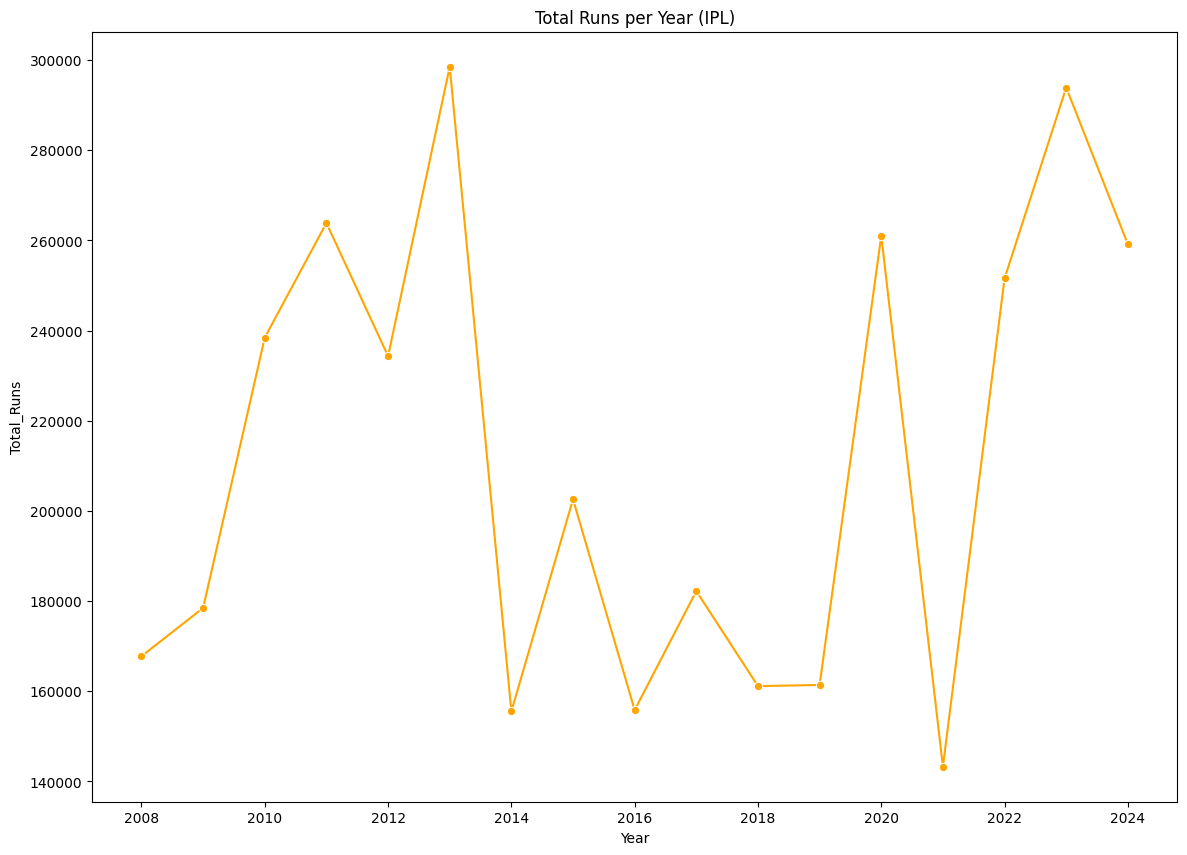

In [9]:
# Convert dates to datetime and extract year

df_ipl['Year'] = pd.to_datetime(df_ipl['Date']).dt.year

# Aggregate by year

yearly_runs = df_ipl.groupby('Year')['Total_Runs'].sum().reset_index()

# Plot

plt.figure(figsize=(14, 10))
sns.lineplot(data=yearly_runs, x='Year', y='Total_Runs', marker='o', color='orange')
plt.title('Total Runs per Year (IPL)')
plt.show()

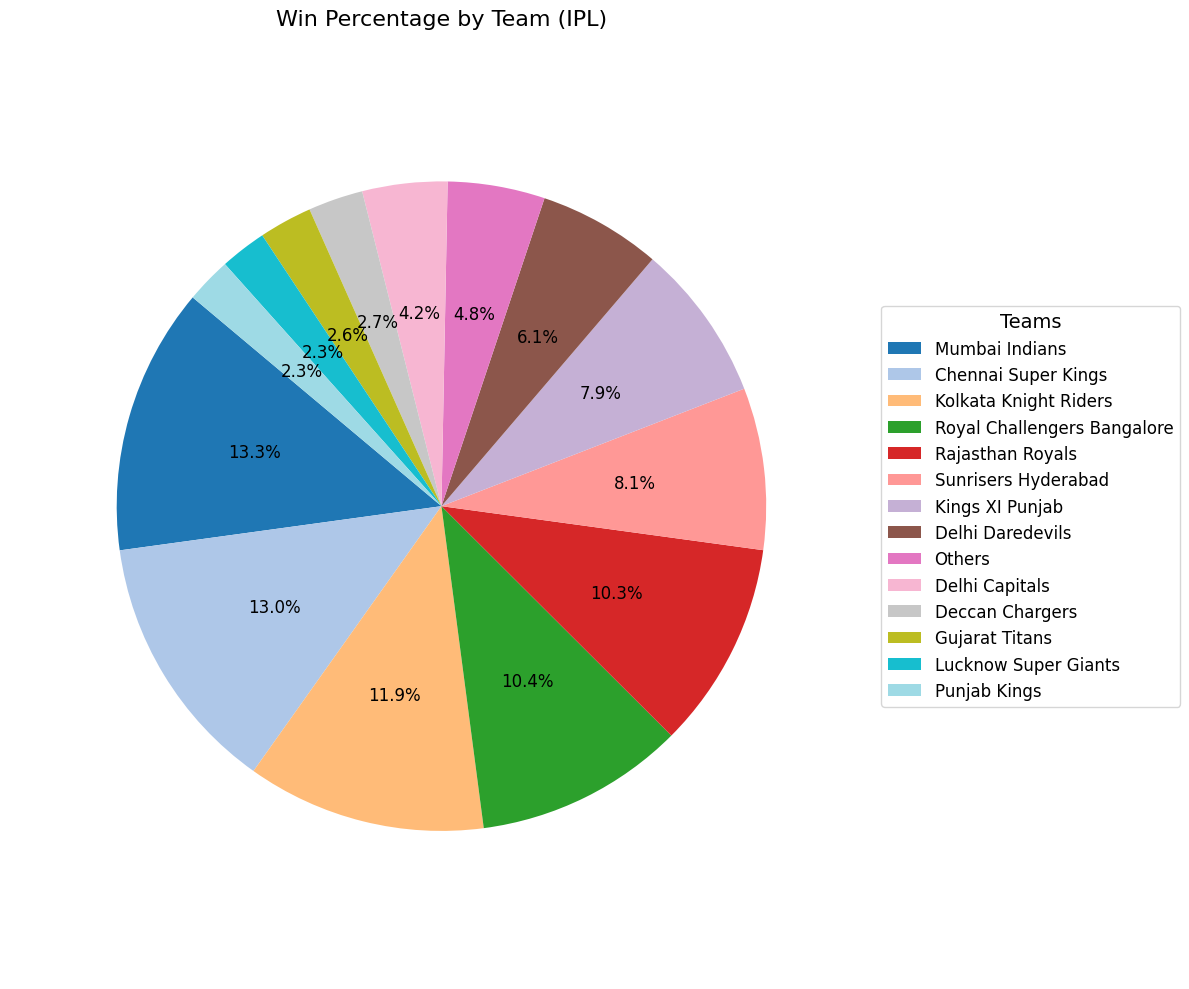

In [10]:
# Calculate win percentages
win_counts = df_ipl['Match_Winner'].value_counts(normalize=True) * 100

# Group teams with <2% wins into "Others"
threshold = 2
win_counts_filtered = win_counts[win_counts >= threshold]
others_percentage = win_counts[win_counts < threshold].sum()
if others_percentage > 0:
    win_counts_filtered['Others'] = others_percentage

# Sort values
win_counts_filtered = win_counts_filtered.sort_values(ascending=False)

# Assign a unique color per team
teams = win_counts_filtered.index
color_map = plt.cm.get_cmap('tab20', len(teams))  # Using tab20 colormap
colors = [color_map(i) for i in range(len(teams))]

# Plot pie chart
fig, ax = plt.subplots(figsize=(12, 10))
wedges, texts, autotexts = ax.pie(
    win_counts_filtered,
    labels=None,  # We’ll use legend instead of labels inside pie
    colors=colors,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
    startangle=140,
    textprops={'fontsize': 12}
)

# Add legend
ax.legend(
    wedges,
    teams,
    title="Teams",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=12,
    title_fontsize=14
)

plt.title("Win Percentage by Team (IPL)", fontsize=16)
plt.axis('equal')  # Make it a circle
plt.tight_layout()
plt.show()


In [11]:
win_counts


Match_Winner
Mumbai Indians                 13.284864
Chennai Super Kings            13.001760
Kolkata Knight Riders          11.904002
Royal Challengers Bangalore    10.436689
Rajasthan Royals               10.319475
Sunrisers Hyderabad             8.055032
Kings XI Punjab                 7.851368
Delhi Daredevils                6.117307
Delhi Capitals                  4.231374
Deccan Chargers                 2.730962
Gujarat Titans                  2.645290
Lucknow Super Giants            2.310005
Punjab Kings                    2.273789
Gujarat Lions                   1.192776
Pune Warriors                   1.122681
Rising Pune Supergiant          0.927974
Royal Challengers Bengaluru     0.649543
Kochi Tuskers Kerala            0.514806
Rising Pune Supergiants         0.430303
Name: proportion, dtype: float64

# Step: 1    Data Cleaning

In [ ]:
# Display Percentage of Missing Values

print("Null values in IPL DataFrame:")
missing_percentage = df_ipl.isnull().mean() * 100
print(missing_percentage)


Null values in IPL DataFrame:
Date                   0.000000
Match_Number           6.063928
City                   4.751265
Venue                  0.000000
Season                 0.000000
Name                   0.000000
Match_Type             0.000000
Total_Overs            0.000000
Teams_Participated     0.000000
Toss_Winner            0.000000
Choose_To              0.000000
Total_Runs            53.434003
Match_Winner           1.580561
Man_Of_Match           0.187797
Team                   0.000000
Over                   4.963207
Batter                 0.000000
Bowler                 0.000000
Non_striker            0.000000
Batter_runs            0.000000
Extras                 0.000000
Total_runs             0.000000
Type                  95.036793
Player_Out            95.036793
Fielder_Name          96.414993
Over_Number           95.036793
Year                   0.000000
dtype: float64


In [27]:
import pandas as pd
import numpy as np

# Step 1: Identify columns with nulls
columns_with_nulls = df_ipl.columns[df_ipl.isnull().sum() > 0]
print("Columns with missing values:", columns_with_nulls)

# Match_Number (ordered, numerical)
if 'Match_Number' in columns_with_nulls:
    df_ipl['Match_Number'] = df_ipl['Match_Number'].interpolate(method='linear').round().astype('Int64')

# Over (numerical, sequential)
if 'Over' in columns_with_nulls:
    df_ipl['Over'] = df_ipl['Over'].interpolate(method='linear').round().astype('Int64')

# Over_Number (sequential, ordered within matches)
if 'Over_Number' in columns_with_nulls:
    # Ensure Match_Number is filled to avoid grouping issues
    df_ipl['Match_Number'] = df_ipl['Match_Number'].fillna(method='ffill').astype('Int64')
    
    # Interpolate within each Match_Number group
    df_ipl['Over_Number'] = df_ipl.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )
    
    # Fallback: Fill remaining nulls with a sequence based on row index within each match
    df_ipl['Over_Number'] = df_ipl.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.fillna(np.arange(1, len(x) + 1))
    )
    
    # Round and convert to Int64
    df_ipl['Over_Number'] = df_ipl['Over_Number'].round().astype('Int64')

# City (categorical)
if 'City' in columns_with_nulls:
    df_ipl['City'] = df_ipl['City'].fillna(df_ipl['City'].mode()[0])

# Total_Runs (numerical, derived from Batter_runs + Extras)
if 'Total_Runs' in columns_with_nulls:
    df_ipl['Total_Runs'] = df_ipl['Total_Runs'].fillna(
        df_ipl['Batter_runs'] + df_ipl['Extras']
    ).astype('Int64')

# Match_Winner (categorical)
if 'Match_Winner' in columns_with_nulls:
    df_ipl['Match_Winner'] = df_ipl['Match_Winner'].fillna(df_ipl['Match_Winner'].mode()[0])

# Man_Of_Match (categorical)
if 'Man_Of_Match' in columns_with_nulls:
    df_ipl['Man_Of_Match'] = df_ipl['Man_Of_Match'].fillna("Unknown")

# Type (categorical, related to dismissal)
if 'Type' in columns_with_nulls:
    df_ipl['Type'] = df_ipl['Type'].fillna("Not Out")

# Player_Out (categorical, related to dismissal)
if 'Player_Out' in columns_with_nulls:
    df_ipl['Player_Out'] = df_ipl['Player_Out'].fillna("Not Out")

# Fielder_Name (categorical, related to dismissal)
if 'Fielder_Name' in columns_with_nulls:
    df_ipl['Fielder_Name'] = df_ipl['Fielder_Name'].fillna("No Fielder")

# Final validation
print("Nulls after imputation:\n", df_ipl.isnull().sum())
print("\nData types:\n", df_ipl.dtypes)

Columns with missing values: Index([], dtype='object')
Nulls after imputation:
 Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
Year                  0
dtype: int64

Data types:
 Date                   object
Match_Number            Int64
City                   object
Venue                  object
Season                 object
Name                   object
Match_Type             object
Total_Overs             int64
Teams

In [28]:
df_ipl.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
Year                  0
dtype: int64

In [31]:
df_ipl.to_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\ipl_json_combined_cleaned.csv", index=False)

In [32]:
df_ipl.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
Year                  0
dtype: int64

In [33]:
import pandas as pd
import numpy as np

# Step 1: Identify columns with nulls
columns_with_nulls = df_odi.columns[df_odi.isnull().sum() > 0]
print("Columns with missing values:", columns_with_nulls)

# Match_Number (ordered, numerical)
if 'Match_Number' in columns_with_nulls:
    df_odi['Match_Number'] = df_odi['Match_Number'].interpolate(method='linear').round().astype('Int64')

# Over (numerical, sequential)
if 'Over' in columns_with_nulls:
    df_odi['Over'] = df_odi['Over'].interpolate(method='linear').round().astype('Int64')

# Over_Number (sequential, ordered within matches)
if 'Over_Number' in columns_with_nulls:
    # Ensure Match_Number is filled to avoid grouping issues
    df_odi['Match_Number'] = df_odi['Match_Number'].fillna(method='ffill').astype('Int64')
    
    # Interpolate within each Match_Number group
    df_odi['Over_Number'] = df_odi.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )
    
    # Fallback: Fill remaining nulls with a sequence based on row index within each match
    df_odi['Over_Number'] = df_odi.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.fillna(np.arange(1, len(x) + 1))
    )
    
    # Round and convert to Int64
    df_odi['Over_Number'] = df_odi['Over_Number'].round().astype('Int64')

# City (categorical)
if 'City' in columns_with_nulls:
    df_odi['City'] = df_odi['City'].fillna(df_odi['City'].mode()[0])

# Total_Runs (numerical)
if 'Total_Runs' in columns_with_nulls:
    # Use median for robustness against outliers
    df_odi['Total_Runs'] = df_odi['Total_Runs'].fillna(df_odi['Total_Runs'].median()).astype('Int64')

# Name (categorical, assuming it represents match or team names)
if 'Name' in columns_with_nulls:
    df_odi['Name'] = df_odi['Name'].fillna(method='ffill').fillna(method='bfill')

# Match_Winner (categorical)
if 'Match_Winner' in columns_with_nulls:
    df_odi['Match_Winner'] = df_odi['Match_Winner'].fillna(df_odi['Match_Winner'].mode()[0])

# Man_Of_Match (categorical)
if 'Man_Of_Match' in columns_with_nulls:
    df_odi['Man_Of_Match'] = df_odi['Man_Of_Match'].fillna("Unknown")

# Type (categorical, related to dismissal)
if 'Type' in columns_with_nulls:
    df_odi['Type'] = df_odi['Type'].fillna("Not Out")

# Player_Out (categorical, related to dismissal)
if 'Player_Out' in columns_with_nulls:
    df_odi['Player_Out'] = df_odi['Player_Out'].fillna("Not Out")

# Fielder_Name (categorical, related to dismissal)
if 'Fielder_Name' in columns_with_nulls:
    df_odi['Fielder_Name'] = df_odi['Fielder_Name'].fillna("No Fielder")

# Final validation
print("Nulls after imputation:\n", df_odi.isnull().sum())
print("\nData types:\n", df_odi.dtypes)

Columns with missing values: Index([], dtype='object')
Nulls after imputation:
 Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

Data types:
 Date                   object
Match_Number            Int64
City                   object
Venue                  object
Season                 object
Name                   object
Match_Type             object
Total_Overs             int64
Teams_Participated     object

In [34]:
df_odi.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

In [37]:
len(df_odi.columns)

26

In [18]:
df_odi.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

In [39]:
df_odi.to_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\odis_json_combined_cleaned.csv", index=False)

In [40]:
df_odi.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

In [41]:
import pandas as pd
import numpy as np

# Step 1: Identify columns with nulls
columns_with_nulls = df_t20.columns[df_t20.isnull().sum() > 0]
print("Columns with missing values:", columns_with_nulls)

# Match_Number (ordered, numerical)
if 'Match_Number' in columns_with_nulls:
    df_t20['Match_Number'] = df_t20['Match_Number'].interpolate(method='linear').round().astype('Int64')

# Over (numerical, sequential)
if 'Over' in columns_with_nulls:
    df_t20['Over'] = df_t20['Over'].interpolate(method='linear').round().astype('Int64')

# Over_Number (sequential, ordered within matches)
if 'Over_Number' in columns_with_nulls:
    # Ensure Match_Number is filled to avoid grouping issues
    df_t20['Match_Number'] = df_t20['Match_Number'].fillna(method='ffill').astype('Int64')
    
    # Interpolate within each Match_Number group
    df_t20['Over_Number'] = df_t20.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )
    
    # Fallback: Fill remaining nulls with a sequence based on row index within each match
    df_t20['Over_Number'] = df_t20.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.fillna(np.arange(1, len(x) + 1))
    )
    
    # Round and convert to Int64
    df_t20['Over_Number'] = df_t20['Over_Number'].round().astype('Int64')

# Name (categorical, assuming match or team names)
if 'Name' in columns_with_nulls:
    df_t20['Name'] = df_t20['Name'].fillna(method='ffill').fillna(method='bfill')

# City (categorical)
if 'City' in columns_with_nulls:
    df_t20['City'] = df_t20['City'].fillna(df_t20['City'].mode()[0])

# Total_Runs (numerical)
if 'Total_Runs' in columns_with_nulls:
    df_t20['Total_Runs'] = df_t20['Total_Runs'].fillna(df_t20['Total_Runs'].median()).astype('Int64')

# Match_Winner (categorical)
if 'Match_Winner' in columns_with_nulls:
    df_t20['Match_Winner'] = df_t20['Match_Winner'].fillna(df_t20['Match_Winner'].mode()[0])

# Man_Of_Match (categorical)
if 'Man_Of_Match' in columns_with_nulls:
    df_t20['Man_Of_Match'] = df_t20['Man_Of_Match'].fillna("Unknown")

# Type (categorical, related to dismissal)
if 'Type' in columns_with_nulls:
    df_t20['Type'] = df_t20['Type'].fillna("Not Out")

# Player_Out (categorical, related to dismissal)
if 'Player_Out' in columns_with_nulls:
    df_t20['Player_Out'] = df_t20['Player_Out'].fillna("Not Out")

# Fielder_Name (categorical, related to dismissal)
if 'Fielder_Name' in columns_with_nulls:
    df_t20['Fielder_Name'] = df_t20['Fielder_Name'].fillna("No Fielder")

# Final validation
print("Nulls after imputation:\n", df_t20.isnull().sum())
print("\nData types:\n", df_t20.dtypes)

Columns with missing values: Index([], dtype='object')
Nulls after imputation:
 Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

Data types:
 Date                   object
Match_Number            Int64
City                   object
Venue                  object
Season                 object
Name                   object
Match_Type             object
Total_Overs             int64
Teams_Participated     object

In [46]:
df_t20.to_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\t20s_json_combined_cleaned.csv", index=False)

In [42]:
df_t20.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

In [21]:
df_t20.isnull().mean() * 100

Date                  0.0
Match_Number          0.0
City                  0.0
Venue                 0.0
Season                0.0
Name                  0.0
Match_Type            0.0
Total_Overs           0.0
Teams_Participated    0.0
Toss_Winner           0.0
Choose_To             0.0
Total_Runs            0.0
Match_Winner          0.0
Man_Of_Match          0.0
Team                  0.0
Over                  0.0
Batter                0.0
Bowler                0.0
Non_striker           0.0
Batter_runs           0.0
Extras                0.0
Total_runs            0.0
Type                  0.0
Player_Out            0.0
Fielder_Name          0.0
Over_Number           0.0
dtype: float64

In [43]:
import pandas as pd
import numpy as np

# Step 1: Identify columns with nulls
columns_with_nulls = df_test.columns[df_test.isnull().sum() > 0]
print("Columns with missing values:", columns_with_nulls)

# Match_Number (ordered, numerical)
if 'Match_Number' in columns_with_nulls:
    df_test['Match_Number'] = df_test['Match_Number'].interpolate(method='linear').round().astype('Int64')

# Over (numerical, sequential)
if 'Over' in columns_with_nulls:
    df_test['Over'] = df_test['Over'].interpolate(method='linear').round().astype('Int64')

# Over_Number (sequential, ordered within matches)
if 'Over_Number' in columns_with_nulls:
    # Ensure Match_Number is filled to avoid grouping issues
    df_test['Match_Number'] = df_test['Match_Number'].fillna(method='ffill').astype('Int64')
    
    # Interpolate within each Match_Number group
    df_test['Over_Number'] = df_test.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.interpolate(method='linear', limit_direction='both')
    )
    
    # Fallback: Fill remaining nulls with a sequence based on row index within each match
    df_test['Over_Number'] = df_test.groupby('Match_Number')['Over_Number'].transform(
        lambda x: x.fillna(np.arange(1, len(x) + 1))
    )
    
    # Round and convert to Int64
    df_test['Over_Number'] = df_test['Over_Number'].round().astype('Int64')

# Name (categorical, assuming match or team names)
if 'Name' in columns_with_nulls:
    df_test['Name'] = df_test['Name'].fillna(method='ffill').fillna(method='bfill')

# City (categorical)
if 'City' in columns_with_nulls:
    df_test['City'] = df_test['City'].fillna(df_test['City'].mode()[0])

# Total_Overs (numerical, derived from max Over per match)
if 'Total_Overs' in columns_with_nulls or 'Total_Overs' in df_test.columns:
    df_test['Total_Overs'] = df_test.groupby('Match_Number')['Over'].transform('max').astype('Int64')
    # Fill any remaining nulls with median Total_Overs
    if df_test['Total_Overs'].isnull().any():
        df_test['Total_Overs'] = df_test['Total_Overs'].fillna(df_test['Total_Overs'].median()).astype('Int64')

# Total_Runs (numerical)
if 'Total_Runs' in columns_with_nulls:
    df_test['Total_Runs'] = df_test['Total_Runs'].fillna(df_test['Total_Runs'].median()).astype('Int64')

# Match_Winner (categorical)
if 'Match_Winner' in columns_with_nulls:
    df_test['Match_Winner'] = df_test['Match_Winner'].fillna(df_test['Match_Winner'].mode()[0])

# Man_Of_Match (categorical)
if 'Man_Of_Match' in columns_with_nulls:
    df_test['Man_Of_Match'] = df_test['Man_Of_Match'].fillna("Unknown")

# Type (categorical, related to dismissal)
if 'Type' in columns_with_nulls:
    df_test['Type'] = df_test['Type'].fillna("Not Out")

# Player_Out (categorical, related to dismissal)
if 'Player_Out' in columns_with_nulls:
    df_test['Player_Out'] = df_test['Player_Out'].fillna("Not Out")

# Fielder_Name (categorical, related to dismissal)
if 'Fielder_Name' in columns_with_nulls:
    df_test['Fielder_Name'] = df_test['Fielder_Name'].fillna("No Fielder")

# Final validation
print("Nulls after imputation:\n", df_test.isnull().sum())
print("\nData types:\n", df_test.dtypes)

Columns with missing values: Index([], dtype='object')
Nulls after imputation:
 Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

Data types:
 Date                   object
Match_Number            Int64
City                   object
Venue                  object
Season                 object
Name                   object
Match_Type             object
Total_Overs             Int64
Teams_Participated     object

In [47]:
df_test.to_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\tests_json_combined_cleaned.csv", index=False)

In [44]:
df_test.isnull().mean() * 100

Date                  0.0
Match_Number          0.0
City                  0.0
Venue                 0.0
Season                0.0
Name                  0.0
Match_Type            0.0
Total_Overs           0.0
Teams_Participated    0.0
Toss_Winner           0.0
Choose_To             0.0
Total_Runs            0.0
Match_Winner          0.0
Man_Of_Match          0.0
Team                  0.0
Over                  0.0
Batter                0.0
Bowler                0.0
Non_striker           0.0
Batter_runs           0.0
Extras                0.0
Total_runs            0.0
Type                  0.0
Player_Out            0.0
Fielder_Name          0.0
Over_Number           0.0
dtype: float64

In [45]:
df_test.isnull().sum()

Date                  0
Match_Number          0
City                  0
Venue                 0
Season                0
Name                  0
Match_Type            0
Total_Overs           0
Teams_Participated    0
Toss_Winner           0
Choose_To             0
Total_Runs            0
Match_Winner          0
Man_Of_Match          0
Team                  0
Over                  0
Batter                0
Bowler                0
Non_striker           0
Batter_runs           0
Extras                0
Total_runs            0
Type                  0
Player_Out            0
Fielder_Name          0
Over_Number           0
dtype: int64

In [48]:
df_ipl= pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\ipl_json_combined_cleaned.csv")
df_odi= pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\odis_json_combined_cleaned.csv") 
df_t20= pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\t20s_json_combined_cleaned.csv")
df_test= pd.read_csv(r"D:\Projects\Mini_Projects\CricSheet_Analysis\CSV_Combined\tests_json_combined_cleaned.csv")   

In [50]:
df_ipl.head()

,Date,Match_Number,City,Venue,Season,Name,Match_Type,Total_Overs,Teams_Participated,Toss_Winner,...,Bowler,Non_striker,Batter_runs,Extras,Total_runs,Type,Player_Out,Fielder_Name,Over_Number,Year
0,2017-04-05,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2017,Indian Premier League,T20,20,"Sunrisers Hyderabad,Royal Challengers Bangalore",Royal Challengers Bangalore,...,TS Mills,S Dhawan,0,0,0,Not Out,Not Out,No Fielder,1.0,2017
1,2017-04-05,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2017,Indian Premier League,T20,20,"Sunrisers Hyderabad,Royal Challengers Bangalore",Royal Challengers Bangalore,...,TS Mills,S Dhawan,0,0,0,Not Out,Not Out,No Fielder,1.0,2017
2,2017-04-05,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2017,Indian Premier League,T20,20,"Sunrisers Hyderabad,Royal Challengers Bangalore",Royal Challengers Bangalore,...,TS Mills,S Dhawan,4,0,4,Not Out,Not Out,No Fielder,1.0,2017
3,2017-04-05,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2017,Indian Premier League,T20,20,"Sunrisers Hyderabad,Royal Challengers Bangalore",Royal Challengers Bangalore,...,TS Mills,S Dhawan,0,0,0,Not Out,Not Out,No Fielder,1.0,2017
4,2017-04-05,1,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",2017,Indian Premier League,T20,20,"Sunrisers Hyderabad,Royal Challengers Bangalore",Royal Challengers Bangalore,...,TS Mills,S Dhawan,0,2,2,Not Out,Not Out,No Fielder,1.0,2017


In [51]:
df_odi.head()

,Date,Match_Number,City,Venue,Season,Name,Match_Type,Total_Overs,Teams_Participated,Toss_Winner,...,Batter,Bowler,Non_striker,Batter_runs,Extras,Total_runs,Type,Player_Out,Fielder_Name,Over_Number
0,2017-01-13,1,Brisbane,"Brisbane Cricket Ground, Woolloongabba",2016/17,Pakistan in Australia ODI Series,ODI,50,"Australia,Pakistan",Australia,...,DA Warner,Mohammad Amir,TM Head,0,0,0,Not Out,Not Out,No Fielder,4
1,2017-01-13,1,Brisbane,"Brisbane Cricket Ground, Woolloongabba",2016/17,Pakistan in Australia ODI Series,ODI,50,"Australia,Pakistan",Australia,...,DA Warner,Mohammad Amir,TM Head,0,0,0,Not Out,Not Out,No Fielder,4
2,2017-01-13,1,Brisbane,"Brisbane Cricket Ground, Woolloongabba",2016/17,Pakistan in Australia ODI Series,ODI,50,"Australia,Pakistan",Australia,...,DA Warner,Mohammad Amir,TM Head,0,0,0,Not Out,Not Out,No Fielder,4
3,2017-01-13,1,Brisbane,"Brisbane Cricket Ground, Woolloongabba",2016/17,Pakistan in Australia ODI Series,ODI,50,"Australia,Pakistan",Australia,...,DA Warner,Mohammad Amir,TM Head,0,0,0,Not Out,Not Out,No Fielder,4
4,2017-01-13,1,Brisbane,"Brisbane Cricket Ground, Woolloongabba",2016/17,Pakistan in Australia ODI Series,ODI,50,"Australia,Pakistan",Australia,...,DA Warner,Mohammad Amir,TM Head,0,1,1,Not Out,Not Out,No Fielder,4


In [52]:
df_t20.head()

,Date,Match_Number,City,Venue,Season,Name,Match_Type,Total_Overs,Teams_Participated,Toss_Winner,...,Batter,Bowler,Non_striker,Batter_runs,Extras,Total_runs,Type,Player_Out,Fielder_Name,Over_Number
0,2017-02-17,1,Kigali City,Melbourne Cricket Ground,2016/17,Sri Lanka in Australia T20I Series,T20,20,"Australia,Sri Lanka",Sri Lanka,...,AJ Finch,SL Malinga,M Klinger,0,0,0,Not Out,Not Out,No Fielder,10
1,2017-02-17,1,Kigali City,Melbourne Cricket Ground,2016/17,Sri Lanka in Australia T20I Series,T20,20,"Australia,Sri Lanka",Sri Lanka,...,AJ Finch,SL Malinga,M Klinger,0,0,0,Not Out,Not Out,No Fielder,10
2,2017-02-17,1,Kigali City,Melbourne Cricket Ground,2016/17,Sri Lanka in Australia T20I Series,T20,20,"Australia,Sri Lanka",Sri Lanka,...,AJ Finch,SL Malinga,M Klinger,1,0,1,Not Out,Not Out,No Fielder,10
3,2017-02-17,1,Kigali City,Melbourne Cricket Ground,2016/17,Sri Lanka in Australia T20I Series,T20,20,"Australia,Sri Lanka",Sri Lanka,...,M Klinger,SL Malinga,AJ Finch,2,0,2,Not Out,Not Out,No Fielder,10
4,2017-02-17,1,Kigali City,Melbourne Cricket Ground,2016/17,Sri Lanka in Australia T20I Series,T20,20,"Australia,Sri Lanka",Sri Lanka,...,M Klinger,SL Malinga,AJ Finch,0,0,0,Not Out,Not Out,No Fielder,10


In [53]:
df_test.head()

,Date,Match_Number,City,Venue,Season,Name,Match_Type,Total_Overs,Teams_Participated,Toss_Winner,...,Batter,Bowler,Non_striker,Batter_runs,Extras,Total_runs,Type,Player_Out,Fielder_Name,Over_Number
0,2016-11-03,1,Perth,Western Australia Cricket Association Ground,2016/17,South Africa in Australia Test Series,Test,248,"Australia,South Africa",South Africa,...,SC Cook,MA Starc,D Elgar,0,0,0,Not Out,Not Out,No Fielder,0
1,2016-11-03,1,Perth,Western Australia Cricket Association Ground,2016/17,South Africa in Australia Test Series,Test,248,"Australia,South Africa",South Africa,...,SC Cook,MA Starc,D Elgar,0,0,0,Not Out,Not Out,No Fielder,0
2,2016-11-03,1,Perth,Western Australia Cricket Association Ground,2016/17,South Africa in Australia Test Series,Test,248,"Australia,South Africa",South Africa,...,SC Cook,MA Starc,D Elgar,0,0,0,Not Out,Not Out,No Fielder,0
3,2016-11-03,1,Perth,Western Australia Cricket Association Ground,2016/17,South Africa in Australia Test Series,Test,248,"Australia,South Africa",South Africa,...,SC Cook,MA Starc,D Elgar,0,0,0,caught,SC Cook,{'name': 'MR Marsh'},0
4,2016-11-03,1,Perth,Western Australia Cricket Association Ground,2016/17,South Africa in Australia Test Series,Test,248,"Australia,South Africa",South Africa,...,HM Amla,MA Starc,D Elgar,0,0,0,Not Out,Not Out,No Fielder,0
